First Name : Abhishek
Last Name : Panda
CWID : 10478684 
Homework : 3

In [1]:
#import libraries 
import pylab as py
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
#load the dataset
bb = pd.read_csv("Baseball_100.csv")

In [3]:
#showing the features and count of homeruns 
features = bb.columns
print(features)
pd.crosstab(index=bb['homeruns'], columns='count')

Index(['firstname', 'lastname', 'age', 'team', 'games', 'at_bats', 'runs',
       'hits', 'doubles', 'triples', 'homeruns', 'RBIs', 'walks', 'strikeouts',
       'bat_ave', 'on_base_pct', 'slugging_pct', 'stolen_bases',
       'caught_stealing'],
      dtype='object')


col_0,count
homeruns,
0,8
1,11
2,11
3,13
4,19
5,9
6,16
7,15
8,11


In [4]:
#extracting the numeric data from the dataset and removing the unnessary columns from table. We also drop 'Homeruns' as it is our target column.
X = bb[[ 'age', 'games', 'at_bats', 'runs',
       'hits', 'doubles', 'triples', 'RBIs', 'walks', 'strikeouts',
       'bat_ave', 'on_base_pct', 'slugging_pct', 'stolen_bases',
       'caught_stealing']]
#printing the training data
print('Training data:')
print(X.head().T)
#printing the covariance of the training dataset X
print('\nCovariance of Training data:')
print(X.cov())
#printing the correlation of the training dataset X
print('\nCorrelation of Training data:')
print(X.corr())

print('\nAs we see our data id not standardized from the above covariance and correlation of data. So we need to standardize our data in next step.')

Training data:
                       0        1        2        3        4
age               24.000   26.000   28.000   28.000   30.000
games            156.000  162.000  157.000  157.000  158.000
at_bats          696.000  662.000  647.000  644.000  638.000
runs             128.000  108.000  111.000  124.000   93.000
hits             209.000  204.000  208.000  191.000  195.000
doubles           51.000   30.000   27.000   26.000   56.000
triples            2.000    0.000    8.000    0.000    3.000
RBIs             102.000  131.000   51.000   75.000  123.000
walks             23.000   38.000   68.000   73.000   30.000
strikeouts       157.000   84.000   62.000  114.000   80.000
bat_ave            0.300    0.308    0.321    0.297    0.306
on_base_pct        0.332    0.354    0.388    0.373    0.332
slugging_pct       0.547    0.508    0.425    0.421    0.539
stolen_bases      41.000    7.000   31.000   32.000    6.000
caught_stealing   13.000    2.000   15.000    3.000    4.000

Covarian

In [5]:
#Standardization of the data
X_standard = StandardScaler().fit_transform(X)
X_standard = pd.DataFrame(data = X_standard, columns=[ 'Age', 'Games', 'At_Bats', 'Runs',
       'Hits', 'Doubles', 'Triples', 'RBIs', 'Walks', 'Strikeouts',
       'Bat_Ave', 'On_Base_Pct', 'Slugging_Pct', 'Stolen_Bases',
       'Caught_Stealing'])
#printing the training data after standardization
print('Standardized Training data:')
print(X_standard.head().T)
#printing the covariance of the training dataset X after standardization
print('\nCovariance of Training data after standardization:')
print(X_standard.cov())
#printing the correlation of the training dataset X after standardization
print('\nCorrelation of Training data after standardization:')
print(X_standard.corr())

Standardized Training data:
                        0         1         2         3         4
Age             -1.238617 -0.737900 -0.237182 -0.237182  0.263536
Games            1.336087  1.486514  1.361158  1.361158  1.386230
At_Bats          2.049631  1.846834  1.757365  1.739471  1.703683
Runs             2.580895  1.920990  2.019975  2.448914  1.426060
Hits             2.267235  2.168758  2.247540  1.912718  1.991499
Doubles          2.747307  0.923664  0.663143  0.576303  3.181508
Triples          0.013714 -0.941710  2.879987 -0.941710  0.491426
RBIs             1.711078  2.629258  0.096348  0.856221  2.375967
Walks           -0.429804  0.183503  1.410116  1.614552 -0.143594
Strikeouts       2.763681  0.603675 -0.047286  1.491349  0.485318
Bat_Ave          1.276944  1.523713  1.924714  1.184405  1.462021
On_Base_Pct      0.207468  0.746415  1.579334  1.211870  0.207468
Slugging_Pct     1.697499  1.204841  0.156362  0.105833  1.596441
Stolen_Bases     4.744556  0.195262  3.406529  3

In [6]:
#PCA on training data
pca = PCA(n_components=15)
#fitting and transforming data to PCA model
principalComponents = pca.fit_transform(X_standard)
#converting back the data to dataframe
principalData = pd.DataFrame(data = principalComponents
             , columns = ['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Principal Component 4', 'Principal Component 5', 
                          'Principal Component 6', 'Principal Component 7', 'Principal Component 8', 'Principal Component 9', 'Principal Component 10',
                          'Principal Component 11', 'Principal Component 12', 'Principal Component 13', 'Principal Component 14', 'Principal Component 15'])
#adding homeruns column
finalData = pd.concat([principalData, bb[['homeruns']]], axis = 1)
#printing the final dataframe
print(finalData.head().T)

                                0          1         2          3          4
Principal Component 1    6.905329   4.354051  5.689585   4.774285   4.831724
Principal Component 2   -3.317098   1.364981 -3.848129  -0.578487   0.621972
Principal Component 3    1.034466   0.009984  2.417138  -0.302052   0.172816
Principal Component 4   -0.408256  -1.464773  2.414603   0.483354  -0.762222
Principal Component 5    0.686894  -0.859704  0.514518   1.338299  -2.301342
Principal Component 6    3.540293   1.469716  0.351694   1.829146   0.744380
Principal Component 7    1.820497  -0.644934 -0.984289  -1.100832   0.649354
Principal Component 8    0.978363   0.303632 -0.740317   2.486938  -0.176552
Principal Component 9   -0.427248   0.362307 -0.120720  -0.327659   0.641678
Principal Component 10  -0.524609   0.991703  0.523895   0.628587  -0.894124
Principal Component 11  -0.165206  -0.541063  0.233312   0.199069  -0.453743
Principal Component 12   0.351094   0.091686  0.220820   0.462905  -0.155488

How many components should be extracted according to the following criterion:

1. The eigenvalue

In [7]:
#creating an correlation matrix with training data
corrMatrix = np.matrix(X_standard.corr())
print(f"Correlation Matrix:\n{corrMatrix}")

Correlation Matrix:
[[ 1.          0.00795227 -0.04350523 -0.04922491 -0.04452607 -0.03900934
  -0.17357129 -0.00346931  0.15450828 -0.09153261 -0.02284891  0.1505961
  -0.02503082 -0.10194707 -0.084399  ]
 [ 0.00795227  1.          0.96809957  0.89713858  0.93588136  0.86108234
   0.43822697  0.84949751  0.73543921  0.76373465  0.46622497  0.48902889
   0.45798002  0.42466788  0.46207093]
 [-0.04350523  0.96809957  1.          0.93558324  0.97859626  0.89766399
   0.47051698  0.87464044  0.70918856  0.75672988  0.50816645  0.47874499
   0.48832242  0.48787786  0.50783639]
 [-0.04922491  0.89713858  0.93558324  1.          0.94915009  0.86740604
   0.44599482  0.88904008  0.78187119  0.73772244  0.57661697  0.62244768
   0.60990539  0.55808655  0.51614501]
 [-0.04452607  0.93588136  0.97859626  0.94915009  1.          0.90979148
   0.45811617  0.89226552  0.69244179  0.70102633  0.65056878  0.57262143
   0.58216794  0.48748011  0.48863245]
 [-0.03900934  0.86108234  0.89766399  0.86740

In [8]:
#calculating the eigen value and eigen vector
eigenValues, eigenVectors = np.linalg.eig(corrMatrix)
print(f"\nEigen values:\n{eigenValues}")


Eigen values:
[8.66666836e+00 1.93971756e+00 1.14274023e+00 1.04000243e+00
 6.07054127e-01 4.68915308e-01 3.48082251e-01 3.06941978e-01
 1.80375842e-01 1.27864905e-01 3.90195561e-03 2.06990944e-02
 5.81791492e-02 4.71708564e-02 4.16859508e-02]


In [9]:
#The eigen values are same as the diagonal elements of covariance of principal component dataframe
principalData.cov()

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,Principal Component 11,Principal Component 12,Principal Component 13,Principal Component 14,Principal Component 15
Principal Component 1,8.708335e+00,-1.064473e-15,5.001879e-17,1.821590e-16,-5.795665e-16,-1.858087e-16,2.746939e-16,-2.845823e-17,7.892780e-17,-1.886289e-16,-1.065994e-16,1.524385e-16,-1.189957e-16,-5.408632e-17,1.212854e-17
Principal Component 2,-1.064473e-15,1.949043e+00,3.677393e-16,2.097222e-16,9.185355e-17,5.100626e-17,-1.366872e-16,5.678928e-17,3.468741e-17,-3.088970e-17,-5.627863e-18,-8.344092e-18,-6.595656e-18,-2.024991e-18,-3.146203e-18
Principal Component 3,5.001879e-17,3.677393e-16,1.148234e+00,-3.435729e-17,-6.995801e-17,-1.417762e-17,-3.032684e-16,-1.047307e-16,-1.014206e-17,1.020255e-16,-7.631944e-17,4.246114e-17,-1.722365e-17,1.781700e-17,2.831192e-18
Principal Component 4,1.821590e-16,2.097222e-16,-3.435729e-17,1.045002e+00,-4.808270e-17,1.339643e-17,-1.175615e-16,-2.183906e-17,-2.742984e-17,4.313252e-17,-3.891909e-17,3.793115e-17,4.421323e-18,-1.208581e-18,1.678537e-18
Principal Component 5,-5.795665e-16,9.185355e-17,-6.995801e-17,-4.808270e-17,6.099727e-01,4.738052e-17,-3.234328e-17,-1.955193e-17,-6.863603e-17,5.159071e-17,5.397356e-18,3.606495e-17,-1.550350e-17,-8.951179e-18,-2.328294e-18
Principal Component 6,-1.858087e-16,5.100626e-17,-1.417762e-17,1.339643e-17,4.738052e-17,4.711697e-01,8.153524e-17,6.170263e-17,2.649325e-17,-5.972981e-17,6.130129e-17,-2.575782e-17,2.660903e-17,8.756285e-18,6.535476e-18
Principal Component 7,2.746939e-16,-1.366872e-16,-3.032684e-16,-1.175615e-16,-3.234328e-17,8.153524e-17,3.497557e-01,3.545140e-17,-5.810871e-17,7.425471e-17,-1.756819e-17,1.160970e-17,-9.144359e-18,-5.009990e-18,-2.561519e-18
Principal Component 8,-2.845823e-17,5.678928e-17,-1.047307e-16,-2.183906e-17,-1.955193e-17,6.170263e-17,3.545140e-17,3.084177e-01,3.430470e-17,-3.877304e-17,-1.383654e-17,1.594555e-17,-2.655282e-17,1.928349e-17,-3.716786e-18
Principal Component 9,7.892780e-17,3.468741e-17,-1.014206e-17,-2.742984e-17,-6.863603e-17,2.649325e-17,-5.810871e-17,3.430470e-17,1.812430e-01,4.748793e-18,-1.306736e-19,-1.237762e-17,-1.014032e-17,1.951555e-17,5.174247e-19
Principal Component 10,-1.886289e-16,-3.088970e-17,1.020255e-16,4.313252e-17,5.159071e-17,-5.972981e-17,7.425471e-17,-3.877304e-17,4.748793e-18,1.284796e-01,-1.621243e-18,-3.080345e-17,2.945275e-18,-1.964850e-18,-2.503938e-18


In [10]:
#percentage of contribution by each principal component
percentage = eigenValues/eigenValues.sum()
print(f"\n Percentage of contribution by each principal component:\n {percentage}")

#finding the cumulative percentage
cumulativePrecentage = eigenValues.cumsum()/eigenValues.sum()
print(f"\n Cumulative Percentage of each principal component:\n {cumulativePrecentage*100}")


 Percentage of contribution by each principal component:
 [5.77777891e-01 1.29314504e-01 7.61826819e-02 6.93334954e-02
 4.04702752e-02 3.12610205e-02 2.32054834e-02 2.04627985e-02
 1.20250561e-02 8.52432703e-03 2.60130374e-04 1.37993963e-03
 3.87860994e-03 3.14472376e-03 2.77906339e-03]

 Cumulative Percentage of each principal component:
 [ 57.77778907  70.70923949  78.32750768  85.26085722  89.30788473
  92.43398678  94.75453512  96.80081497  98.00332059  98.85575329
  98.88176633  99.01976029  99.40762129  99.72209366 100.        ]


From the above eigen values we can say that 4 principal components can be choosen beacuse they have eigen value more than 1. It gives us 85.260857% of contribution. We can take more elements to make the data accurate but 4 componets are enough to determine.

2. The proportion of variance explained.


In [11]:
#printing the variance ratio of each principal component 
var = np.round(pca.explained_variance_ratio_, decimals=3)*100
print(f'Principle component contribution:\n {var}')

Principle component contribution:
 [57.8 12.9  7.6  6.9  4.   3.1  2.3  2.   1.2  0.9  0.4  0.3  0.3  0.1
  0. ]


To find the number of componets we need to find the ratio between total variance and total number of component.
- ratio = Variance / number of componets used in PCA
- ratio = 100 ÷ 15 = 6.667

We have to consider all the ratio of principle component contribution that is above the value 6.667. So, From the above output values we can say that 4 principal components are to be extracted.

3. The scree plot criterion.

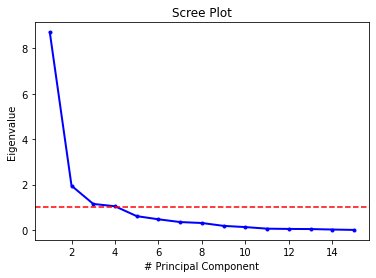

In [12]:
#Scree plot with explained_variance_. where x axis is principal component number and y axis is Eigen value.
pca_values = np.arange(pca.n_components_) + 1
plt.plot(pca_values, pca.explained_variance_, '.-', linewidth=2, color='blue')
plt.style.context('seaborn-whitegrid') 
plt.axhline (y=1, color='r', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('# Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

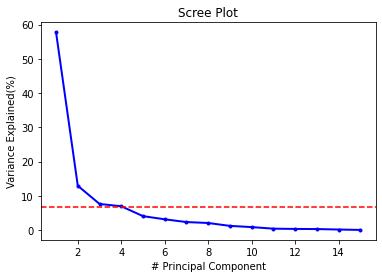

In [13]:
#Scree plot with explained_variance_ratio_. where x axis is principal component number and y axis is Variance Explained(%).
pca_values = np.arange(pca.n_components_) + 1
plt.plot(pca_values, pca.explained_variance_ratio_*100, '.-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.style.context('seaborn-whitegrid') 
plt.axhline (y=6.667, color='r', linestyle='--')
plt.xlabel('# Principal Component')
plt.ylabel('Variance Explained(%)')
plt.show()

From the above 2 Scree plots we can say that 4 principal components are enough. And rest componets won't matter much.